# Hot Canon Ball (Steady State Solve)


![Hot Canon Ball](./images/HotCanonFig.png)

In [1]:
from underworld import UWGeodynamics as GEO
from UWGeodynamics import visualisation as vis

loaded rc file /home/jovyan/workspace/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

In [3]:
velocity = 1.0 * u.centimeter / u.hour
model_length = 2. * u.meter
model_height = 1. * u.meter
minTemp = 300. * u.degK
maxTemp = 1000. * u.degK
bodyforce = 200 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_height
Kt = KL / velocity
KM = bodyforce * KL**2 * Kt**2
KT = maxTemp - minTemp

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM
GEO.scaling_coefficients["[temperature]"] = KT

In [4]:
Model = GEO.Model(elementRes=(128, 128), 
                  minCoord=(-1. * u.meter, -50. * u.centimeter), 
                  maxCoord=(1. * u.meter, 50. * u.centimeter))

In [5]:
Model.outputDir = "1_25_Hot_Canon_ball"

In [6]:
Model.diffusivity = 1e-6 * u.metre**2 / u.second 
Model.capacity    = 1000. * u.joule / (u.kelvin * u.kilogram)

In [7]:
Disk = GEO.shapes.Disk(center=(0.,0.), radius=30. * u.centimetre)

Background = Model.add_material(name="BackGround", shape=GEO.shapes.Layer2D(top=Model.top, bottom=Model.bottom))
CanonBall  = Model.add_material(name="CanonBall", shape=Disk)


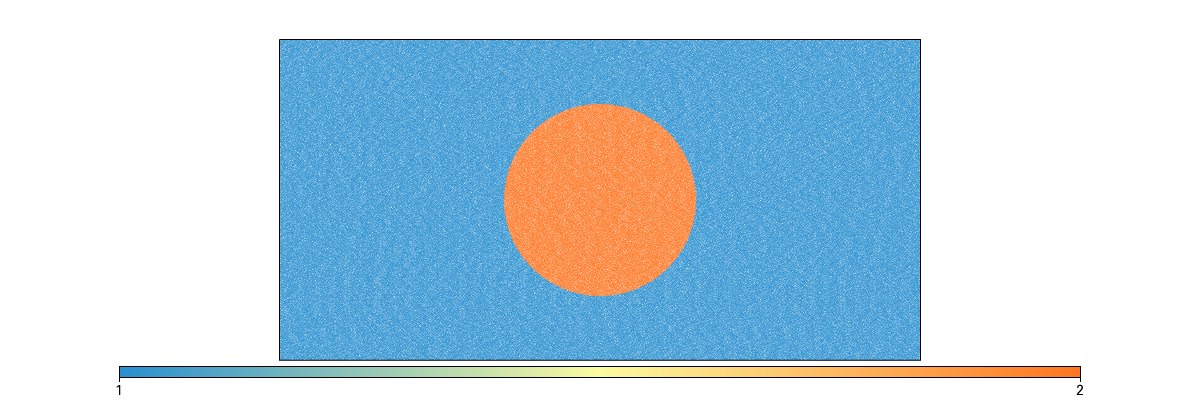

In [8]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.swarm, Model.materialField)
Fig.save("Figure_1.png")
Fig.show()

In [9]:
Model.set_temperatureBCs(top=maxTemp, bottom=minTemp, nodeSets=[(Disk, maxTemp)])

In [10]:
Model.init_model(temperature="steady-state")

/usr/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)



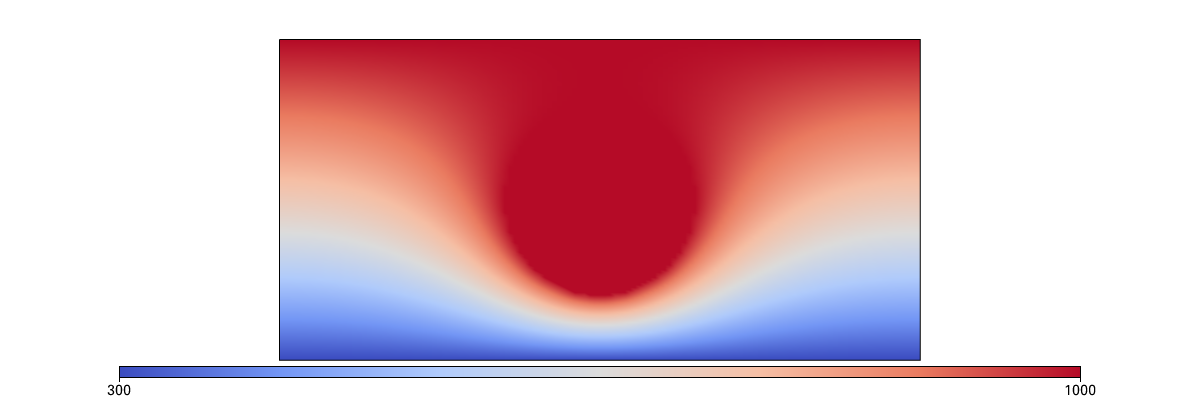

In [11]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Surface(Model.mesh, GEO.dimensionalise(Model.temperature, u.degK), colours="coolwarm")
Fig.save("Figure_2.png")
Fig.show()